# PANDAS PYTHON - Time Series (partie 1)

URL :
- **Le tutoriel :**
https://youtu.be/qHRLG5hsW9I?si=d7vYaqzNSINM0wrY
- **Les données (du bitcoin)** (de 4/1/2024 à 1/1/2025, **365 jours**):
https://coinmarketcap.com/currencies/bitcoin/historical-data/
- **Les données (de l'ethereum)** (de 8/7/2024 à 2/1/2025, **180 jours**):
https://coinmarketcap.com/currencies/ethereum/historical-data/

## Bitcoin et les séries temporelles

## DateTimeIndex

In [5]:
#importations
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
#lire le fichier csv et l'enregistrer sous une variable appelée bitcoin
bitcoin = pd.read_csv('BTC-EUR.csv', delimiter=';')

#afficher les 5 premieres lignes de bitcoin
bitcoin.head()

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
0,2025-01-01T00:00:00.000Z,2025-01-01T23:59:59.999Z,2025-01-01T21:25:00.000Z,2025-01-01T09:28:00.000Z,2781,93425.102136,94929.864809,92788.127885,94419.757505,2.451989e+10,1.869850e+12,2025-01-01T23:59:59.999Z
1,2024-12-31T00:00:00.000Z,2024-12-31T23:59:59.999Z,2024-12-31T14:35:00.000Z,2024-12-31T01:32:00.000Z,2781,92643.251222,96090.603788,91914.027783,93429.202811,4.362511e+10,1.850183e+12,2024-12-31T23:59:59.999Z
2,2024-12-30T00:00:00.000Z,2024-12-30T23:59:59.999Z,2024-12-30T20:25:00.000Z,2024-12-30T15:11:00.000Z,2781,93527.197497,94903.323896,91317.135460,92643.214604,5.618800e+10,1.834643e+12,2024-12-30T23:59:59.999Z
3,2024-12-29T00:00:00.000Z,2024-12-29T23:59:59.999Z,2024-12-29T00:00:00.000Z,2024-12-29T23:12:00.000Z,2781,95174.055117,95174.878402,92881.791870,93530.228438,2.963589e+10,1.852119e+12,2024-12-29T23:59:59.999Z
4,2024-12-28T00:00:00.000Z,2024-12-28T23:59:59.999Z,2024-12-28T22:53:00.000Z,2024-12-28T01:27:00.000Z,2781,94160.186223,95525.898522,94014.286497,95163.931926,2.410744e+10,1.884684e+12,2024-12-28T23:59:59.999Z


In [7]:
#supprimer des colonnes (['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'marketCap'])
#et enregistrer les modifications sous la variable appelée bitcoin
bitcoin = bitcoin.drop(['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'marketCap'], axis=1)

#afficher les 5 premieres lignes de bitcoin
bitcoin.head()

,name,open,high,low,close,volume,timestamp
0,2781,93425.102136,94929.864809,92788.127885,94419.757505,2.451989e+10,2025-01-01T23:59:59.999Z
1,2781,92643.251222,96090.603788,91914.027783,93429.202811,4.362511e+10,2024-12-31T23:59:59.999Z
2,2781,93527.197497,94903.323896,91317.135460,92643.214604,5.618800e+10,2024-12-30T23:59:59.999Z
3,2781,95174.055117,95174.878402,92881.791870,93530.228438,2.963589e+10,2024-12-29T23:59:59.999Z
4,2781,94160.186223,95525.898522,94014.286497,95163.931926,2.410744e+10,2024-12-28T23:59:59.999Z


<Axes: >

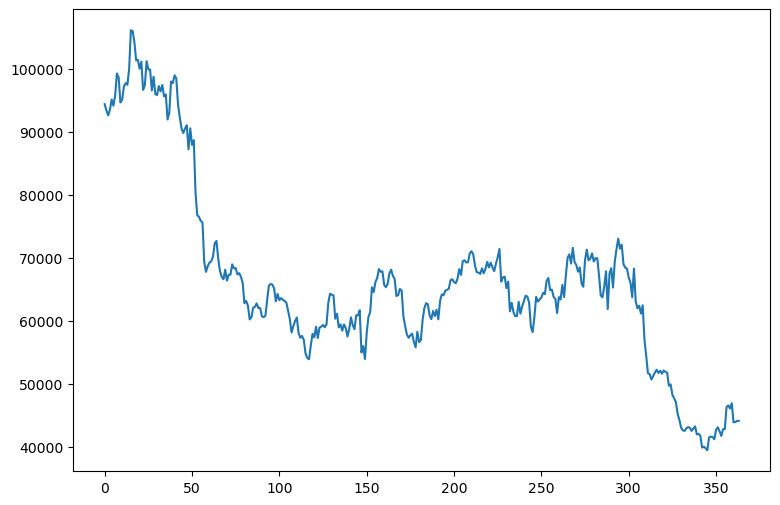

In [8]:
#l'évolution de 'close'
bitcoin['close'].plot(figsize=(9, 6))

In [9]:
#on a pas de dates dans l'axe des x
#on utilise alors la colonne 'timestamp' comme index

In [10]:
#convertir la colonne 'timestamp' en type datetime  
bitcoin['timestamp'] = pd.to_datetime(bitcoin['timestamp'])  

#diviser la colonne 'timestamp' en deux colonnes : 'date' et 'time'  
bitcoin['date'] = bitcoin['timestamp'].dt.date  
bitcoin['time'] = bitcoin['timestamp'].dt.time.astype(str).str.replace('Z', '')  

#afficher les 5 premières lignes du DataFrame bitcoin  
bitcoin.head()  

,name,open,high,low,close,volume,timestamp,date,time
0,2781,93425.102136,94929.864809,92788.127885,94419.757505,2.451989e+10,2025-01-01 23:59:59.999000+00:00,2025-01-01,23:59:59.999000
1,2781,92643.251222,96090.603788,91914.027783,93429.202811,4.362511e+10,2024-12-31 23:59:59.999000+00:00,2024-12-31,23:59:59.999000
2,2781,93527.197497,94903.323896,91317.135460,92643.214604,5.618800e+10,2024-12-30 23:59:59.999000+00:00,2024-12-30,23:59:59.999000
3,2781,95174.055117,95174.878402,92881.791870,93530.228438,2.963589e+10,2024-12-29 23:59:59.999000+00:00,2024-12-29,23:59:59.999000
4,2781,94160.186223,95525.898522,94014.286497,95163.931926,2.410744e+10,2024-12-28 23:59:59.999000+00:00,2024-12-28,23:59:59.999000


In [11]:
#supprimer la colonne timestamp et time
#et enregistrer les modifications sous la variable appelée bitcoin_2
bitcoin_2 = bitcoin.drop(['timestamp', 'time'], axis=1)

#afficher les 5 premieres lignes de bitcoin_2
bitcoin_2.head()

,name,open,high,low,close,volume,date
0,2781,93425.102136,94929.864809,92788.127885,94419.757505,2.451989e+10,2025-01-01
1,2781,92643.251222,96090.603788,91914.027783,93429.202811,4.362511e+10,2024-12-31
2,2781,93527.197497,94903.323896,91317.135460,92643.214604,5.618800e+10,2024-12-30
3,2781,95174.055117,95174.878402,92881.791870,93530.228438,2.963589e+10,2024-12-29
4,2781,94160.186223,95525.898522,94014.286497,95163.931926,2.410744e+10,2024-12-28


In [12]:
#définir l'index pour qu'il devienne la colonne 'date'
#et enregistrer les modifications sous la variable appelée bitcoin_3
bitcoin_3 = bitcoin_2.set_index('date')

#afficher les 5 premieres lignes de bitcoin_3
bitcoin_3.head()

,name,open,high,low,close,volume
date,,,,,,
2025-01-01,2781,93425.102136,94929.864809,92788.127885,94419.757505,2.451989e+10
2024-12-31,2781,92643.251222,96090.603788,91914.027783,93429.202811,4.362511e+10
2024-12-30,2781,93527.197497,94903.323896,91317.135460,92643.214604,5.618800e+10
2024-12-29,2781,95174.055117,95174.878402,92881.791870,93530.228438,2.963589e+10
2024-12-28,2781,94160.186223,95525.898522,94014.286497,95163.931926,2.410744e+10


In [13]:
#les index du dataframe bitcoin_2
bitcoin_2.index

#c'est l'index par défaut, du dataframe bitcoin

RangeIndex(start=0, stop=364, step=1)

In [14]:
#convertir la colonne index en type datetime dans bitcoin_3
bitcoin_3.index = pd.to_datetime(bitcoin_3.index)

In [15]:
#les index du dataframe bitcoin_3
bitcoin_3.index

DatetimeIndex(['2025-01-01', '2024-12-31', '2024-12-30', '2024-12-29',
               '2024-12-28', '2024-12-27', '2024-12-26', '2024-12-25',
               '2024-12-24', '2024-12-23',
               ...
               '2024-01-13', '2024-01-12', '2024-01-11', '2024-01-10',
               '2024-01-09', '2024-01-08', '2024-01-07', '2024-01-06',
               '2024-01-05', '2024-01-04'],
              dtype='datetime64[ns]', name='date', length=364, freq=None)

In [16]:
#trier l'index de bitcoin_3
bitcoin_3 = bitcoin_3.sort_index()

#afficher bitcoin_3
bitcoin_3

,name,open,high,low,close,volume
date,,,,,,
2024-01-04,2781,42855.814761,44770.023414,42675.174007,44179.921701,3.044809e+10
2024-01-05,2781,44192.978699,44353.285859,42784.718266,44162.691630,3.233603e+10
2024-01-06,2781,44178.954607,44227.631307,43475.156431,43989.194093,1.609250e+10
2024-01-07,2781,43998.464243,44495.571471,43662.228627,43943.097229,1.933057e+10
2024-01-08,2781,43948.706955,47218.001125,43244.081606,46970.502314,4.274619e+10
...,...,...,...,...,...,...
2024-12-28,2781,94160.186223,95525.898522,94014.286497,95163.931926,2.410744e+10
2024-12-29,2781,95174.055117,95174.878402,92881.791870,93530.228438,2.963589e+10
2024-12-30,2781,93527.197497,94903.323896,91317.135460,92643.214604,5.618800e+10


In [17]:
#on est maintenant prêt à l'analyse de Time Series!!!

<Axes: xlabel='date'>

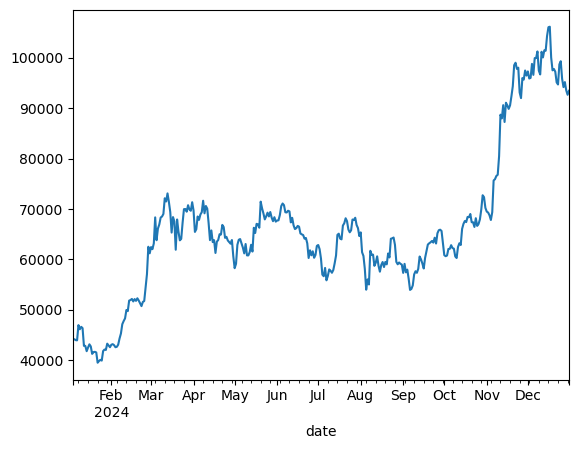

In [18]:
#l'évolution de la colonne 'close' en 2024
bitcoin_3['close']['2024'].plot()

<Axes: xlabel='date'>

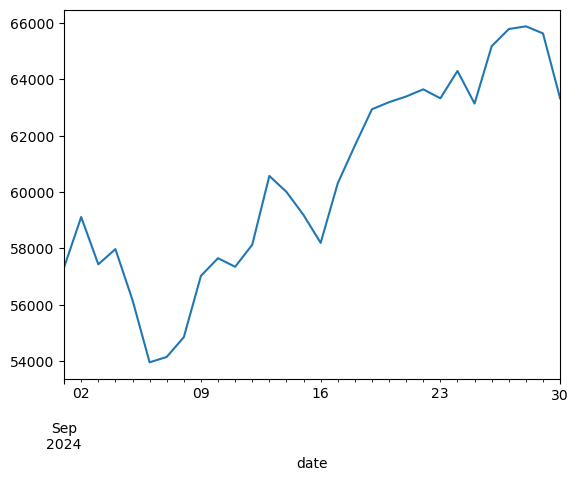

In [19]:
#l'évolution de la colonne 'close' en septembre 2024
bitcoin_3['close']['2024-09'].plot()

<Axes: xlabel='date'>

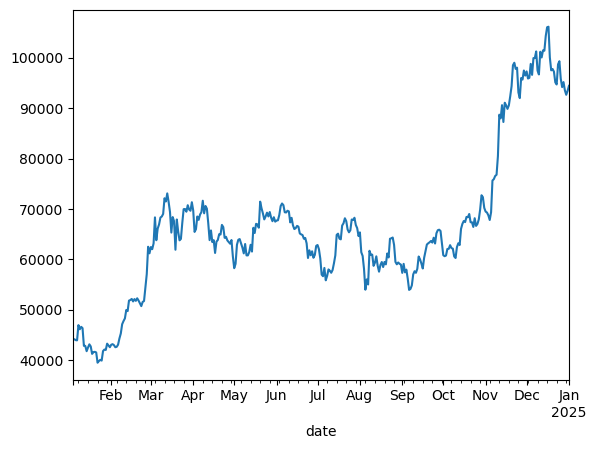

In [20]:
#l'évolution de la colonne 'close' entre 2024 et 2025
bitcoin_3['close']['2024':'2025'].plot()

<Axes: xlabel='date'>

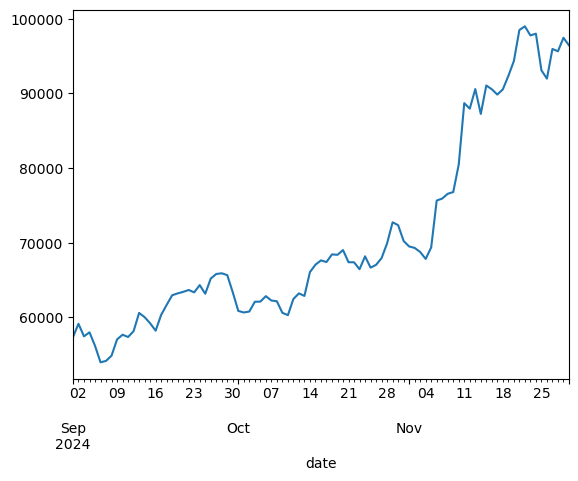

In [21]:
#l'évolution de la colonne 'close' entre sep 2024 et nov 2024
bitcoin_3['close']['2024-09':'2024-11'].plot()

<Axes: xlabel='date'>

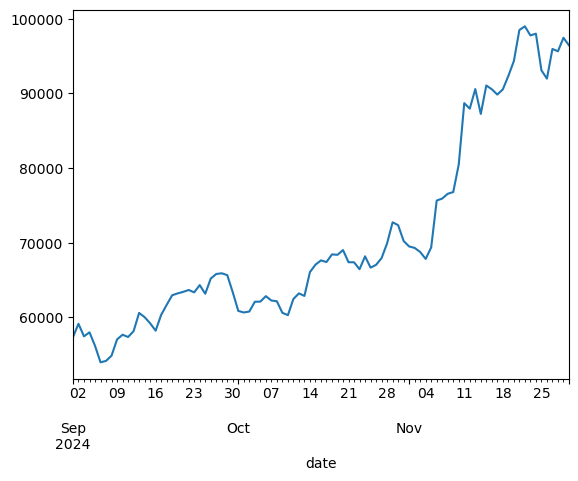

In [22]:
#l'évolution de la colonne 'close' entre sep 2024 et nov 2024 en utilisant loc
bitcoin_3.loc['2024-09':'2024-11', 'close'].plot()

In [23]:
#on obtient le même résultat

## Pandas: resample() et agg()

### resample()

C:\Users\HP\AppData\Local\Temp\ipykernel_10516\323699767.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bitcoin_3.loc['2024']['close'].resample('M').mean().plot()


Text(0, 0.5, 'Prix moyen')

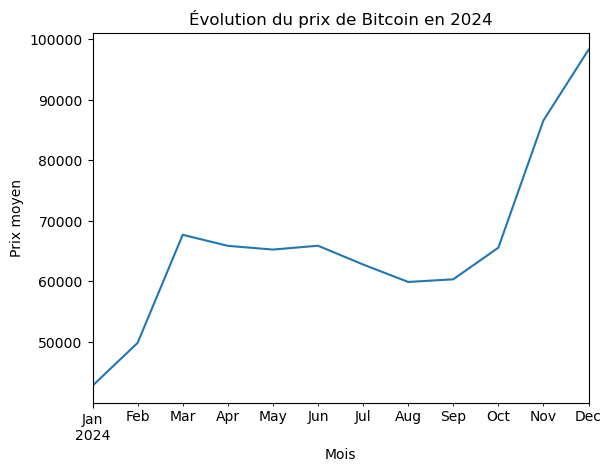

In [26]:
#s'assurer que l'index est de type datetime  
bitcoin_3.index = pd.to_datetime(bitcoin_3.index)  

#filtrer les données de l'année 2024 et agréger par mois
#chaque point du graph représente la moyenne (de 'close') en chaque mois
bitcoin_3.loc['2024']['close'].resample('M').mean().plot()

plt.title('Évolution du prix de Bitcoin en 2024')  #titre du graphique
plt.xlabel('Mois')                                 #axe des x
plt.ylabel('Prix moyen')                           #axe des y

Text(0, 0.5, 'Prix moyen')

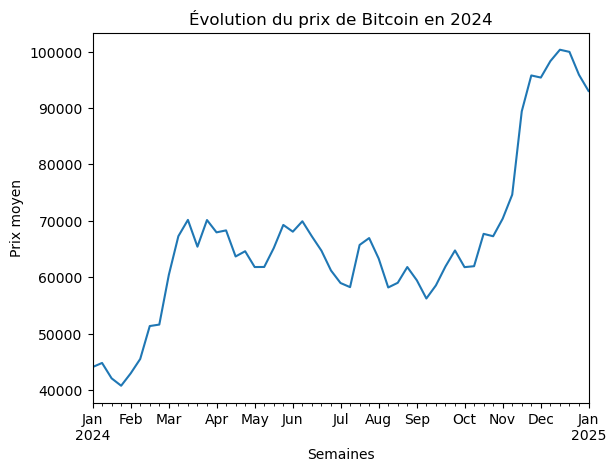

In [27]:
#filtrer les données de l'année 2024 et agréger par semaine ('W')
#chaque point du graph représente la moyenne (de 'close') en chaque semaine
bitcoin_3.loc['2024']['close'].resample('W').mean().plot()

plt.title('Évolution du prix de Bitcoin en 2024')  #titre du graphique
plt.xlabel('Semaines')                             #axe des x
plt.ylabel('Prix moyen')                           #axe des y

Text(0, 0.5, 'Prix moyen')

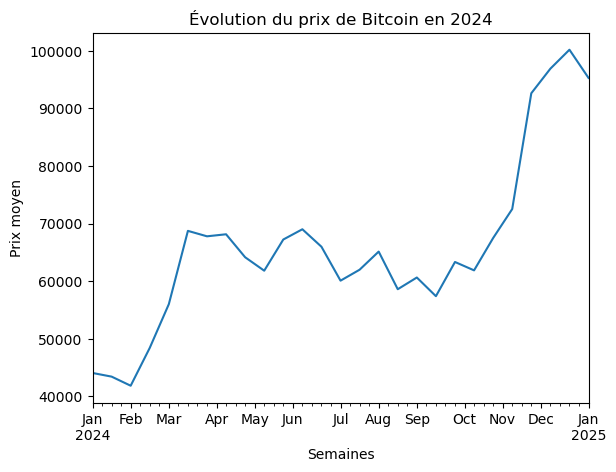

In [28]:
#filtrer les données de l'année 2024 et agréger par 2 semaines ('2W')
#chaque point du graph représente la moyenne (de 'close') toutes les 2 semaines
bitcoin_3.loc['2024']['close'].resample('2W').mean().plot()

plt.title('Évolution du prix de Bitcoin en 2024')  #titre du graphique
plt.xlabel('Semaines')                             #axe des x
plt.ylabel('Prix moyen')                           #axe des y

<Axes: xlabel='date'>

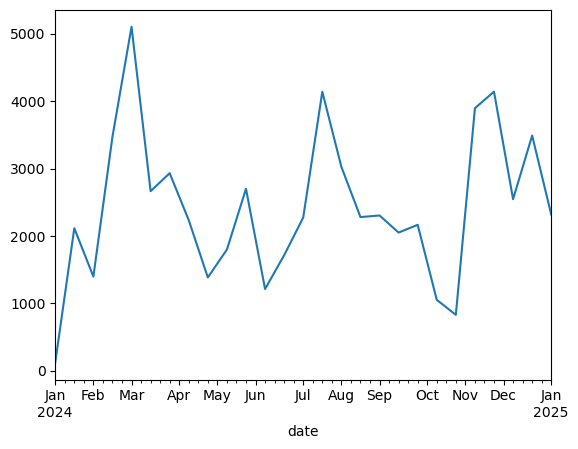

In [29]:
#filtrer les données de l'année 2024 et agréger par 2 semaines ('2W')
#chaque point du graph représente l'écart type (de 'close') toutes les 2 semaines
bitcoin_3.loc['2024']['close'].resample('2W').std().plot()

In [30]:
#on voit que le bitcoin est volatile en ce moment

C:\Users\HP\AppData\Local\Temp\ipykernel_10516\3747470214.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bitcoin_3.loc['2024']['close'].resample('M').mean().plot(label= 'Moyenne par mois', lw=3, ls= ':', alpha= 0.8)


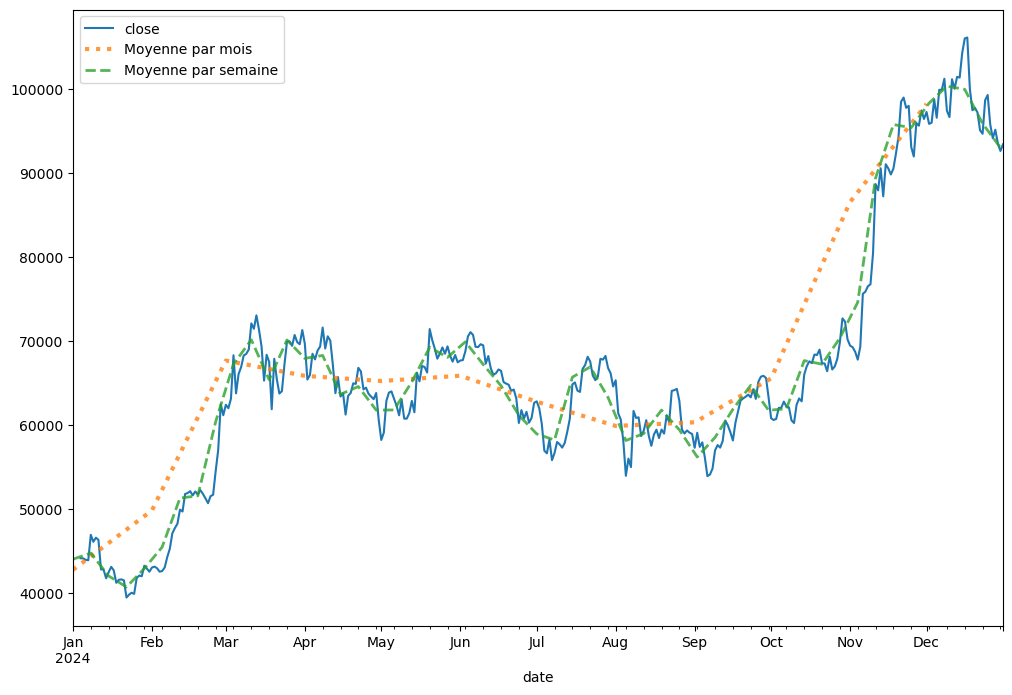

In [31]:
#créer une figure pour le graphique avec une taille personnalisée
plt.figure(figsize= (12, 8))

#l'évolution de la colonne 'close' en 2024
bitcoin_3['close']['2024'].plot()

#filtrer les données de l'année 2024 et agréger par mois
#avec nom du graph, l'épaisseur du trait, le style du trait, et alpha=0.8
bitcoin_3.loc['2024']['close'].resample('M').mean().plot(label= 'Moyenne par mois', lw=3, ls= ':', alpha= 0.8)

#filtrer les données de l'année 2024 et agréger par semaine ('W')
#avec nom du graph, l'épaisseur du trait, le style du trait, et alpha=0.8
bitcoin_3.loc['2024']['close'].resample('W').mean().plot(label= 'Moyenne par semaine', lw=2, ls= '--', alpha= 0.8)

#ajouter une légende
plt.legend()

### agg()

In [33]:
#filtrer les données de l'année 2024 et regrouper par semaine  
#on applique la méthode resample pour effectuer un rééchantillonnage hebdomadaire   
#puis on utilise agg pour calculer plusieurs statistiques : moyenne, écart type, minimum et maximum.  
bitcoin_3.loc['2024']['close'].resample('W').agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
date,,,,
2024-01-07,44068.726163,120.141494,43943.097229,44179.921701
2024-01-14,44799.773663,2196.664814,41796.269606,46970.502314
2024-01-21,42071.628410,721.103654,41262.058364,43154.944234
2024-01-28,40762.332080,1165.341190,39507.368824,42120.056352
2024-02-04,42951.560931,275.944786,42582.606390,43288.245336
2024-02-11,45510.789060,2273.766465,42658.666048,48293.916751
2024-02-18,51344.523025,1036.495267,49742.440990,52160.202829
2024-02-25,51606.351630,486.005601,50731.949191,52284.873557
2024-03-03,60421.256422,3293.332372,54522.401537,63167.370358


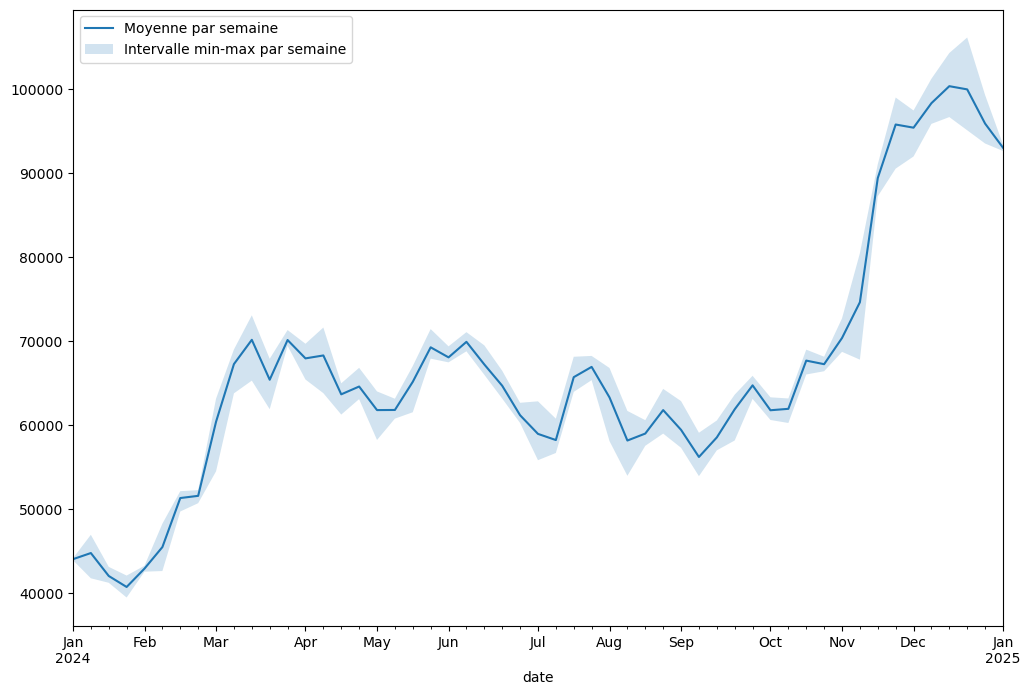

In [34]:
#filtrer les données de l'année 2024 et regrouper par semaine  
#on applique la méthode resample pour effectuer un rééchantillonnage hebdomadaire   
#puis on utilise agg pour calculer plusieurs statistiques : moyenne, écart type, minimum et maximum.  
m = bitcoin_3.loc['2024']['close'].resample('W').agg(['mean', 'std', 'min', 'max'])  

#créer une figure pour le graphique avec une taille personnalisée  
plt.figure(figsize=(12, 8))  

#tracer la moyenne hebdomadaire sur le graphique  
#m['mean']['2024'] correspond aux moyennes calculées par semaine pour 2024  
m['mean'].plot(label='Moyenne par semaine')  

# ajouter une zone colorée entre les valeurs maximum et minimum  
#`fill_between` va colorer la zone (d'incertitude) entre la limite supérieure (max) et inférieure (min)  
plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='Intervalle min-max par semaine')  

#ajouter une légende pour comprendre les différents éléments du graphique  
plt.legend()

## Pandas rolling(): moving average

Au lieu de faire une moyenne de toutes les valeurs, on fait **la moyenne sur une fenêtre de valeurs (window)**.

- Exemple: On définit une fenêtre de 7 jours, puis on décale de 1 jour, puis on recalcule la moyenne des 7 jours après,...etc.

On définit cette fonction 'roulante' avec la fonction: **pd.rolling(window)**.

In [37]:
bitcoin_3.loc['2024']['close'].rolling(window= 7)

# La méthode rolling(window=7) permet de créer une fenêtre glissante de 7 jours
#pour effectuer des calculs tels que la moyenne, la somme, etc., sur cette période de temps.

Rolling [window=7,center=False,axis=0,method=single]

<Axes: xlabel='date'>

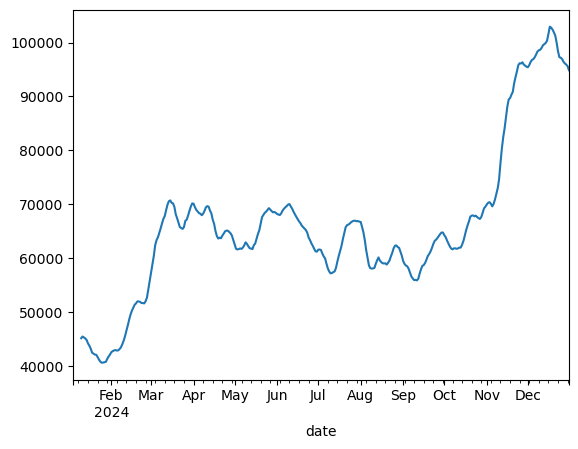

In [38]:
#calculer la moyenne gillsante sur 7 jours et afficher avec matplotlib
bitcoin_3.loc['2024']['close'].rolling(window= 7).mean().plot()

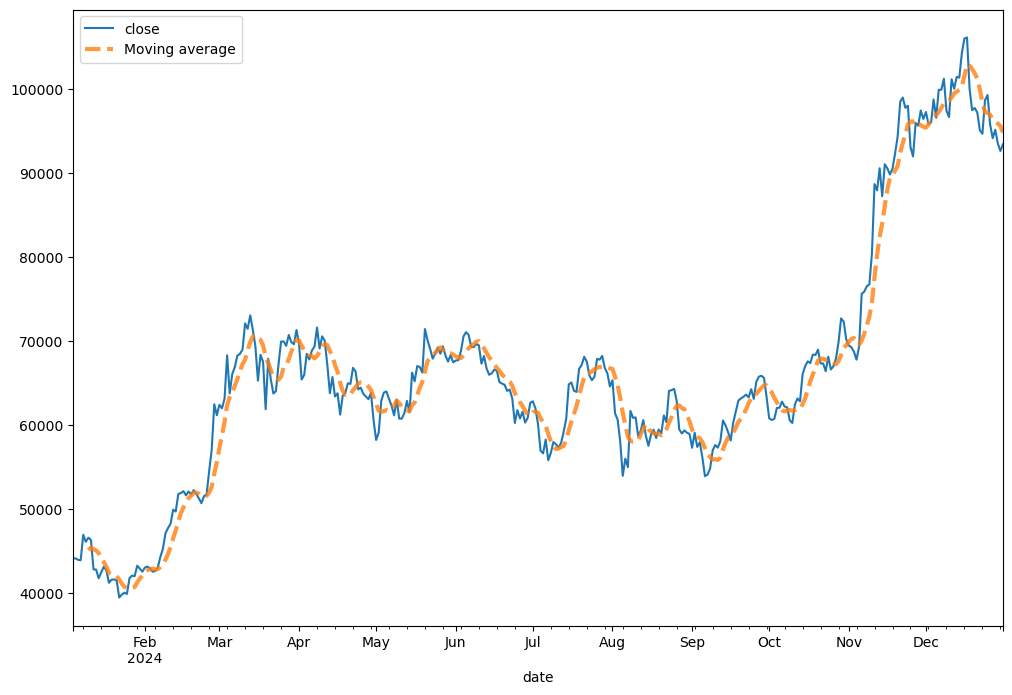

In [39]:
#créer une figure pour le graphique avec une taille personnalisée
plt.figure(figsize= (12, 8))

#l'évolution de la colonne 'close' en 2024
bitcoin_3['close']['2024'].plot()

#calculer la moyenne gillsante sur 7 jours et afficher avec matplotlib
bitcoin_3.loc['2024']['close'].rolling(window= 7).mean().plot(label= 'Moving average', lw=3, ls= '--', alpha= 0.8)

#ajouter une légende
plt.legend()

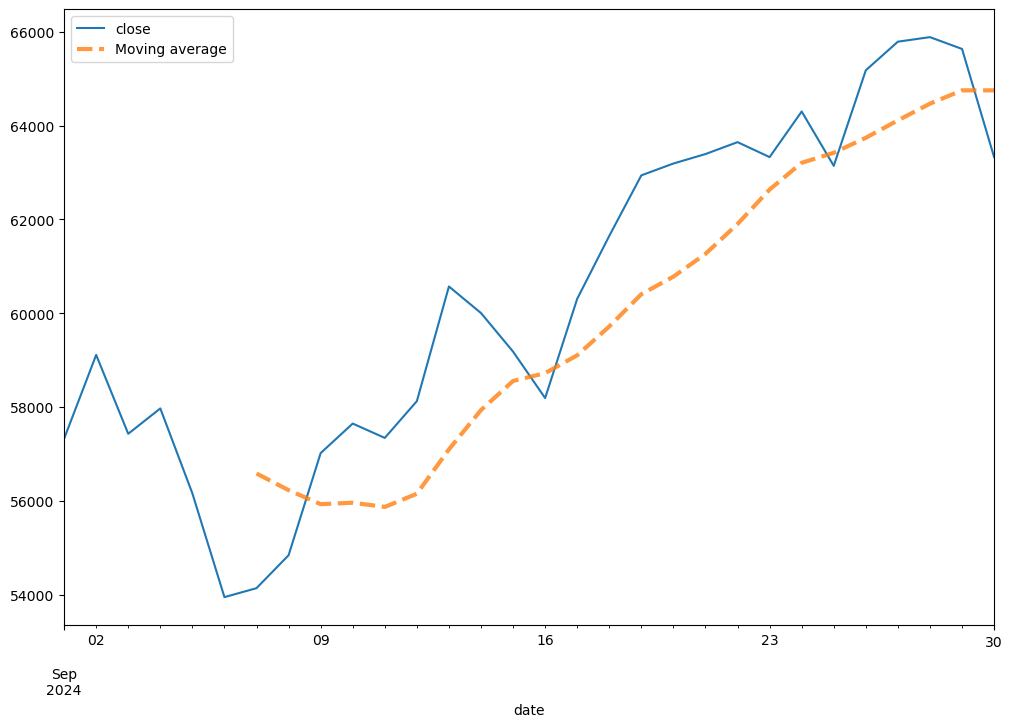

In [40]:
#créer une figure pour le graphique avec une taille personnalisée
plt.figure(figsize= (12, 8))

#l'évolution de la colonne 'close' en sep 2024
bitcoin_3['close']['2024-09'].plot()

#calculer la moyenne gillsante sur 7 jours et afficher avec matplotlib
bitcoin_3.loc['2024-09']['close'].rolling(window= 7).mean().plot(label= 'Moving average', lw=3, ls= '--', alpha= 0.8)

#ajouter une légende
plt.legend()

In [41]:
#on observe que le graph Moving average ne commence pas par le début du signal.
#c'est pcq'on a pris une fenêtre de 7j, on a regardé tous les chiffres, et au 7ème jour, on a placé la moyenne
#on peut placer cette moyenne au milieu de cette fenêtre, en écrivant center=True:
#rolling(window, center= False).mean()
#rolling(window, center= True).mean()

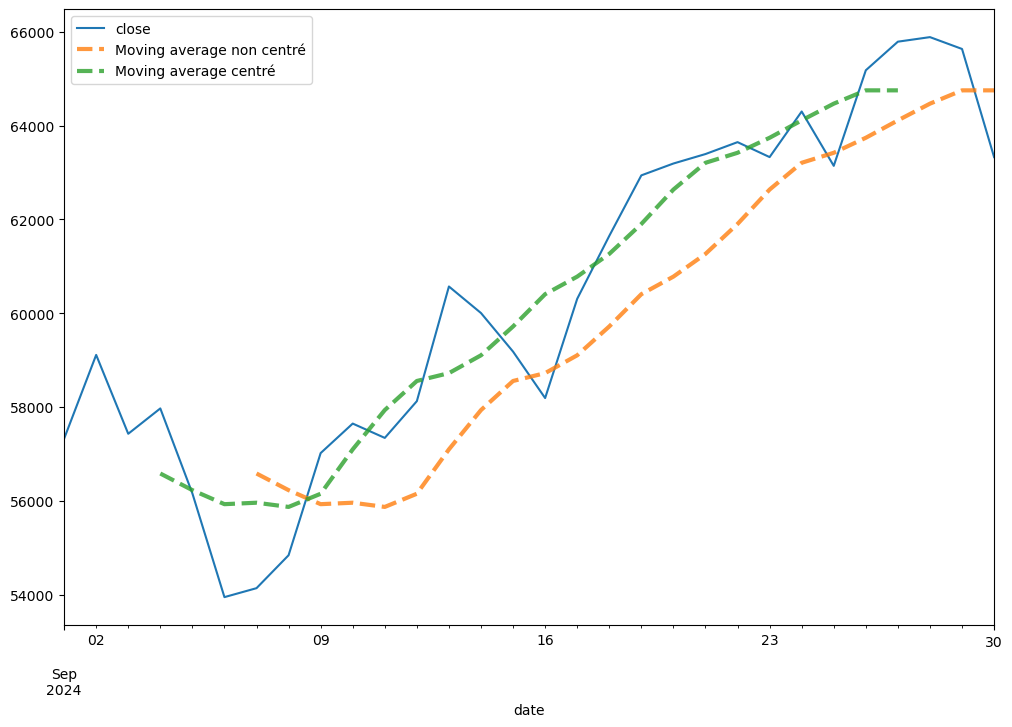

In [42]:
#créer une figure pour le graphique avec une taille personnalisée
plt.figure(figsize= (12, 8))

#l'évolution de la colonne 'close' en sep 2024
bitcoin_3['close']['2024-09'].plot()

#calculer la moyenne gillsante sur 7 jours et afficher avec matplotlib
bitcoin_3.loc['2024-09']['close'].rolling(window= 7).mean().plot(label= 'Moving average non centré', lw=3, ls= '--', alpha= 0.8)

#calculer la moyenne gillsante sur 7 jours, avec center=True, puis afficher avec matplotlib
bitcoin_3.loc['2024-09']['close'].rolling(window= 7, center= True).mean().plot(label= 'Moving average centré', lw=3, ls= '--', alpha= 0.8)

#ajouter une légende
plt.legend()

In [43]:
#c'est un petit peu mieux mais sans plus, on peut faire mieux que ça
#en utilisant exp weighted function

## Pandas ewm(): exponential weighted function

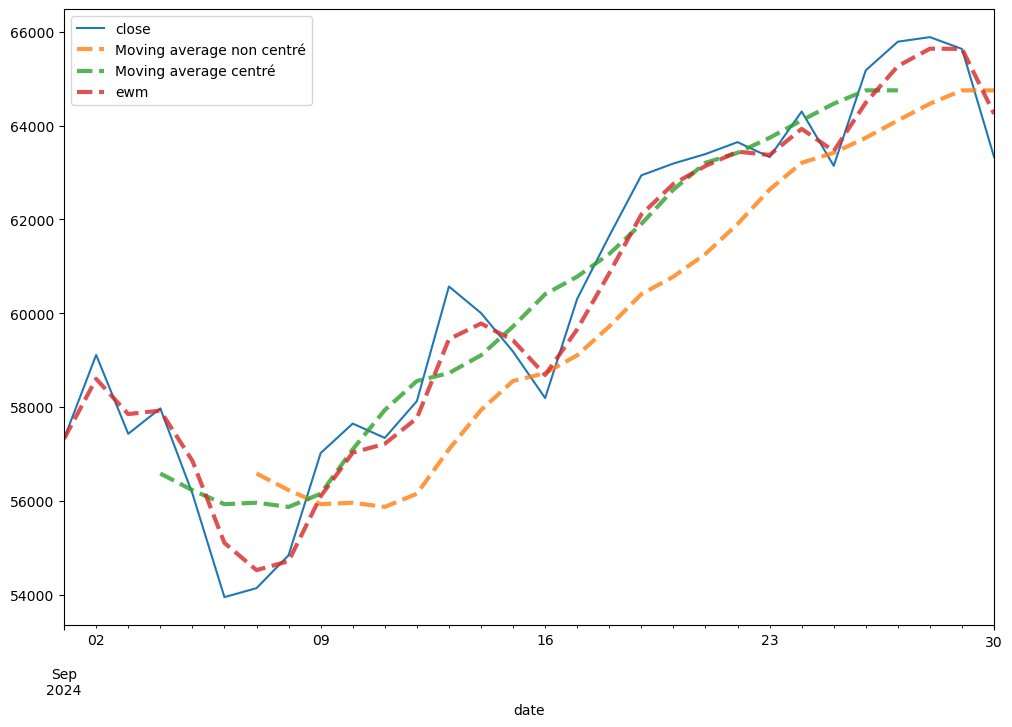

In [45]:
#créer une figure pour le graphique avec une taille personnalisée
plt.figure(figsize= (12, 8))

#l'évolution de la colonne 'close' en sep 2024
bitcoin_3['close']['2024-09'].plot()

#calculer la moyenne gillsante sur 7 jours et afficher avec matplotlib
bitcoin_3.loc['2024-09']['close'].rolling(window= 7).mean().plot(label= 'Moving average non centré', lw=3, ls= '--', alpha= 0.8)

#calculer la moyenne gillsante sur 7 jours, avec center=True, puis afficher avec matplotlib
bitcoin_3.loc['2024-09']['close'].rolling(window= 7, center= True).mean().plot(label= 'Moving average centré', lw=3, ls= '--', alpha= 0.8)

#calculer la moyenne mobile exponentielle avec alpha=0.6 et afficher avec matplotlib 
bitcoin_3.loc['2024-09']['close'].ewm(alpha= 0.6).mean().plot(label= 'ewm', lw=3, ls= '--', alpha= 0.8)

#ajouter une légende
plt.legend()

In [46]:
#ewm suit mieux la tendance du bitcoin que les moving average centré et non centré

## Pandas merge(): inner, outer,...etc

## Ethereum et les séries temporelles

In [49]:
#lire le fichier csv et l'enregistrer sous une variable appelée ethereum
ethereum = pd.read_csv('ETH-EUR.csv', delimiter=';')

#afficher les 5 premieres lignes de ethereum
ethereum.head()

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
0,2025-01-02T00:00:00.000Z,2025-01-02T23:59:59.999Z,2025-01-02T15:01:00.000Z,2025-01-02T00:07:00.000Z,2781,3353.412059,3493.448168,3348.352091,3451.392693,2.224357e+10,4.158420e+11,2025-01-02T23:59:59.999Z
1,2025-01-01T00:00:00.000Z,2025-01-01T23:59:59.999Z,2025-01-01T22:26:00.000Z,2025-01-01T09:27:00.000Z,2781,3332.406415,3366.531494,3310.255767,3353.504174,1.419541e+10,4.040006e+11,2025-01-01T23:59:59.999Z
2,2024-12-31T00:00:00.000Z,2024-12-31T23:59:59.999Z,2024-12-31T14:35:00.000Z,2024-12-31T01:13:00.000Z,2781,3356.394805,3444.396634,3311.412658,3332.531721,2.084545e+10,4.014639e+11,2024-12-31T23:59:59.999Z
3,2024-12-30T00:00:00.000Z,2024-12-30T23:59:59.999Z,2024-12-30T01:38:00.000Z,2024-12-30T15:01:00.000Z,2781,3349.585935,3428.527405,3298.804558,3356.392699,2.698158e+10,4.043474e+11,2024-12-30T23:59:59.999Z
4,2024-12-29T00:00:00.000Z,2024-12-29T23:59:59.999Z,2024-12-29T10:42:00.000Z,2024-12-29T23:15:00.000Z,2781,3397.862646,3406.648539,3321.664726,3349.513340,1.344091e+10,4.035203e+11,2024-12-29T23:59:59.999Z


In [50]:
#supprimer des colonnes (['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'marketCap'])
#et enregistrer les modifications sous la variable appelée ethereum
ethereum = ethereum.drop(['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'marketCap'], axis=1)

#afficher les 5 premieres lignes de ethereum
ethereum.head()

,name,open,high,low,close,volume,timestamp
0,2781,3353.412059,3493.448168,3348.352091,3451.392693,2.224357e+10,2025-01-02T23:59:59.999Z
1,2781,3332.406415,3366.531494,3310.255767,3353.504174,1.419541e+10,2025-01-01T23:59:59.999Z
2,2781,3356.394805,3444.396634,3311.412658,3332.531721,2.084545e+10,2024-12-31T23:59:59.999Z
3,2781,3349.585935,3428.527405,3298.804558,3356.392699,2.698158e+10,2024-12-30T23:59:59.999Z
4,2781,3397.862646,3406.648539,3321.664726,3349.513340,1.344091e+10,2024-12-29T23:59:59.999Z


In [51]:
#convertir la colonne 'timestamp' en type datetime  
ethereum['timestamp'] = pd.to_datetime(ethereum['timestamp'])  

#diviser la colonne 'timestamp' en deux colonnes : 'date' et 'time'  
ethereum['date'] = ethereum['timestamp'].dt.date  
ethereum['time'] = ethereum['timestamp'].dt.time.astype(str).str.replace('Z', '')  

#afficher les 5 premières lignes du DataFrame ethereum  
ethereum.head()  

,name,open,high,low,close,volume,timestamp,date,time
0,2781,3353.412059,3493.448168,3348.352091,3451.392693,2.224357e+10,2025-01-02 23:59:59.999000+00:00,2025-01-02,23:59:59.999000
1,2781,3332.406415,3366.531494,3310.255767,3353.504174,1.419541e+10,2025-01-01 23:59:59.999000+00:00,2025-01-01,23:59:59.999000
2,2781,3356.394805,3444.396634,3311.412658,3332.531721,2.084545e+10,2024-12-31 23:59:59.999000+00:00,2024-12-31,23:59:59.999000
3,2781,3349.585935,3428.527405,3298.804558,3356.392699,2.698158e+10,2024-12-30 23:59:59.999000+00:00,2024-12-30,23:59:59.999000
4,2781,3397.862646,3406.648539,3321.664726,3349.513340,1.344091e+10,2024-12-29 23:59:59.999000+00:00,2024-12-29,23:59:59.999000


In [52]:
#supprimer la colonne timestamp et time
#et enregistrer les modifications sous la variable appelée ethereum_2
ethereum_2 = ethereum.drop(['timestamp', 'time'], axis=1)

#afficher les 5 premieres lignes de ethereum_2
ethereum_2.head()

,name,open,high,low,close,volume,date
0,2781,3353.412059,3493.448168,3348.352091,3451.392693,2.224357e+10,2025-01-02
1,2781,3332.406415,3366.531494,3310.255767,3353.504174,1.419541e+10,2025-01-01
2,2781,3356.394805,3444.396634,3311.412658,3332.531721,2.084545e+10,2024-12-31
3,2781,3349.585935,3428.527405,3298.804558,3356.392699,2.698158e+10,2024-12-30
4,2781,3397.862646,3406.648539,3321.664726,3349.513340,1.344091e+10,2024-12-29


In [53]:
#définir l'index pour qu'il devienne la colonne 'date'
#et enregistrer les modifications sous la variable appelée ethereum_3
ethereum_3 = ethereum_2.set_index('date')

#afficher les 5 premieres lignes de ethereum_3
ethereum_3.head()

,name,open,high,low,close,volume
date,,,,,,
2025-01-02,2781,3353.412059,3493.448168,3348.352091,3451.392693,2.224357e+10
2025-01-01,2781,3332.406415,3366.531494,3310.255767,3353.504174,1.419541e+10
2024-12-31,2781,3356.394805,3444.396634,3311.412658,3332.531721,2.084545e+10
2024-12-30,2781,3349.585935,3428.527405,3298.804558,3356.392699,2.698158e+10
2024-12-29,2781,3397.862646,3406.648539,3321.664726,3349.513340,1.344091e+10


In [54]:
#convertir la colonne index en type datetime dans ethereum_3
ethereum_3.index = pd.to_datetime(ethereum_3.index)

In [55]:
#trier l'index de ethereum_3
ethereum_3 = ethereum_3.sort_index()

#afficher ethereum_3
ethereum_3

,name,open,high,low,close,volume
date,,,,,,
2024-07-08,2781,2929.861641,3090.664541,2826.481719,3018.732032,2.262738e+10
2024-07-09,2781,3018.803314,3105.800439,3005.522306,3064.032884,1.526995e+10
2024-07-10,2781,3066.137268,3148.407560,3026.608404,3102.218794,1.457868e+10
2024-07-11,2781,3101.335253,3208.938501,3057.219250,3100.330753,1.523010e+10
2024-07-12,2781,3099.990015,3154.601597,3048.508119,3134.158663,1.275164e+10
...,...,...,...,...,...,...
2024-12-29,2781,3397.862646,3406.648539,3321.664726,3349.513340,1.344091e+10
2024-12-30,2781,3349.585935,3428.527405,3298.804558,3356.392699,2.698158e+10
2024-12-31,2781,3356.394805,3444.396634,3311.412658,3332.531721,2.084545e+10


In [56]:
#on est désormais prêt pour l'analyse!

<Axes: xlabel='date'>

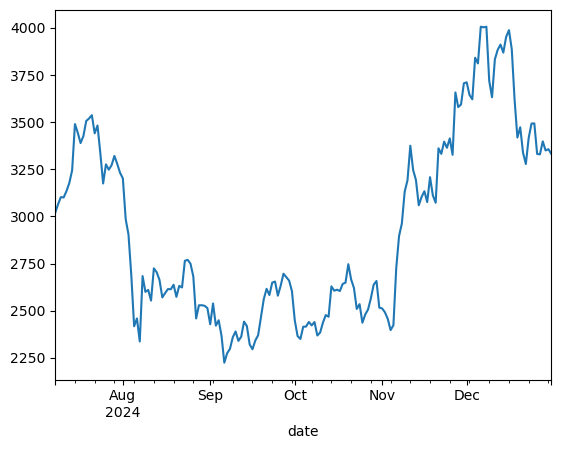

In [57]:
#l'évolution de la colonne 'close' en 2024
ethereum_3['close']['2024'].plot()

In [58]:
#assembler les 2 datasets bitcoin_3 et ethereum_3 en utilisant merge
#en utilisant la colonne date
#façon d'assemblage (how): inner
pd.merge(bitcoin_3, ethereum_3, on= 'date', how= 'inner')

,name_x,open_x,high_x,low_x,close_x,volume_x,name_y,open_y,high_y,low_y,close_y,volume_y
date,,,,,,,,,,,,
2024-07-08,2781,55849.573769,58131.337301,54321.019064,56705.098427,3.976616e+10,2781,2929.861641,3090.664541,2826.481719,3018.732032,2.262738e+10
2024-07-09,2781,56704.596936,58239.196998,56316.875154,58009.226316,2.784951e+10,2781,3018.803314,3105.800439,3005.522306,3064.032884,1.526995e+10
2024-07-10,2781,58033.884486,59359.432392,57178.412525,57742.494621,2.617526e+10,2781,3066.137268,3148.407560,3026.608404,3102.218794,1.457868e+10
2024-07-11,2781,57729.890804,59299.434286,57120.377509,57344.914785,2.870780e+10,2781,3101.335253,3208.938501,3057.219250,3100.330753,1.523010e+10
2024-07-12,2781,57341.194934,58532.553058,56590.174489,57899.465517,2.560481e+10,2781,3099.990015,3154.601597,3048.508119,3134.158663,1.275164e+10
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-28,2781,94160.186223,95525.898522,94014.286497,95163.931926,2.410744e+10,2781,3328.774597,3419.920281,3318.033886,3397.902273,1.430565e+10
2024-12-29,2781,95174.055117,95174.878402,92881.791870,93530.228438,2.963589e+10,2781,3397.862646,3406.648539,3321.664726,3349.513340,1.344091e+10
2024-12-30,2781,93527.197497,94903.323896,91317.135460,92643.214604,5.618800e+10,2781,3349.585935,3428.527405,3298.804558,3356.392699,2.698158e+10


In [59]:
#les colonnes '---_x' correspondent au dataframe bitcoin_3
#les colonnes '---_y' correspondent au dataframe ethereum_3

In [60]:
#pour changer les suffixes '_x' et '_y' en '_btc' et '_eth'
pd.merge(bitcoin_3, ethereum_3, on= 'date', how= 'inner', suffixes= ('_btc', '_eth'))

,name_btc,open_btc,high_btc,low_btc,close_btc,volume_btc,name_eth,open_eth,high_eth,low_eth,close_eth,volume_eth
date,,,,,,,,,,,,
2024-07-08,2781,55849.573769,58131.337301,54321.019064,56705.098427,3.976616e+10,2781,2929.861641,3090.664541,2826.481719,3018.732032,2.262738e+10
2024-07-09,2781,56704.596936,58239.196998,56316.875154,58009.226316,2.784951e+10,2781,3018.803314,3105.800439,3005.522306,3064.032884,1.526995e+10
2024-07-10,2781,58033.884486,59359.432392,57178.412525,57742.494621,2.617526e+10,2781,3066.137268,3148.407560,3026.608404,3102.218794,1.457868e+10
2024-07-11,2781,57729.890804,59299.434286,57120.377509,57344.914785,2.870780e+10,2781,3101.335253,3208.938501,3057.219250,3100.330753,1.523010e+10
2024-07-12,2781,57341.194934,58532.553058,56590.174489,57899.465517,2.560481e+10,2781,3099.990015,3154.601597,3048.508119,3134.158663,1.275164e+10
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-28,2781,94160.186223,95525.898522,94014.286497,95163.931926,2.410744e+10,2781,3328.774597,3419.920281,3318.033886,3397.902273,1.430565e+10
2024-12-29,2781,95174.055117,95174.878402,92881.791870,93530.228438,2.963589e+10,2781,3397.862646,3406.648539,3321.664726,3349.513340,1.344091e+10
2024-12-30,2781,93527.197497,94903.323896,91317.135460,92643.214604,5.618800e+10,2781,3349.585935,3428.527405,3298.804558,3356.392699,2.698158e+10


In [61]:
#on voit que les données ici commencent à partir de 8/7/2024 (d'où commencent celles de l'ethereum_3)
#Les données du bitcoin_3 commencent du 4/1/2024
#how= 'inner' permet d'assembler les 2 datasets seulement avec les index qu'ils ont en commun

In [62]:
#how= 'outer'
pd.merge(bitcoin_3, ethereum_3, on= 'date', how= 'outer', suffixes= ('_btc', '_eth'))

,name_btc,open_btc,high_btc,low_btc,close_btc,volume_btc,name_eth,open_eth,high_eth,low_eth,close_eth,volume_eth
date,,,,,,,,,,,,
2024-01-04,2781.0,42855.814761,44770.023414,42675.174007,44179.921701,3.044809e+10,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-05,2781.0,44192.978699,44353.285859,42784.718266,44162.691630,3.233603e+10,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-06,2781.0,44178.954607,44227.631307,43475.156431,43989.194093,1.609250e+10,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-07,2781.0,43998.464243,44495.571471,43662.228627,43943.097229,1.933057e+10,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-08,2781.0,43948.706955,47218.001125,43244.081606,46970.502314,4.274619e+10,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-29,2781.0,95174.055117,95174.878402,92881.791870,93530.228438,2.963589e+10,2781.0,3397.862646,3406.648539,3321.664726,3349.513340,1.344091e+10
2024-12-30,2781.0,93527.197497,94903.323896,91317.135460,92643.214604,5.618800e+10,2781.0,3349.585935,3428.527405,3298.804558,3356.392699,2.698158e+10
2024-12-31,2781.0,92643.251222,96090.603788,91914.027783,93429.202811,4.362511e+10,2781.0,3356.394805,3444.396634,3311.412658,3332.531721,2.084545e+10


In [63]:
#how= 'outer' signifie un assemblage de tous les données (de bitcoin_3 et ethereum_3)
#NaN signifie que les données n'existent pas
#on voit que les données ici commencent à partir de 4/1/2024 (d'où commencent celles de l'bitcoin_3)

In [64]:
#créer la variable btc_eth
btc_eth = pd.merge(bitcoin_3, ethereum_3, on= 'date', how= 'inner', suffixes= ('_btc', '_eth'))

In [65]:
#afficher les colonnes du dataframe btc_eth: close_btc et close_eth
btc_eth[['close_btc', 'close_eth']]

,close_btc,close_eth
date,,
2024-07-08,56705.098427,3018.732032
2024-07-09,58009.226316,3064.032884
2024-07-10,57742.494621,3102.218794
2024-07-11,57344.914785,3100.330753
2024-07-12,57899.465517,3134.158663
...,...,...
2024-12-28,95163.931926,3397.902273
2024-12-29,93530.228438,3349.513340
2024-12-30,92643.214604,3356.392699


<Axes: xlabel='date'>

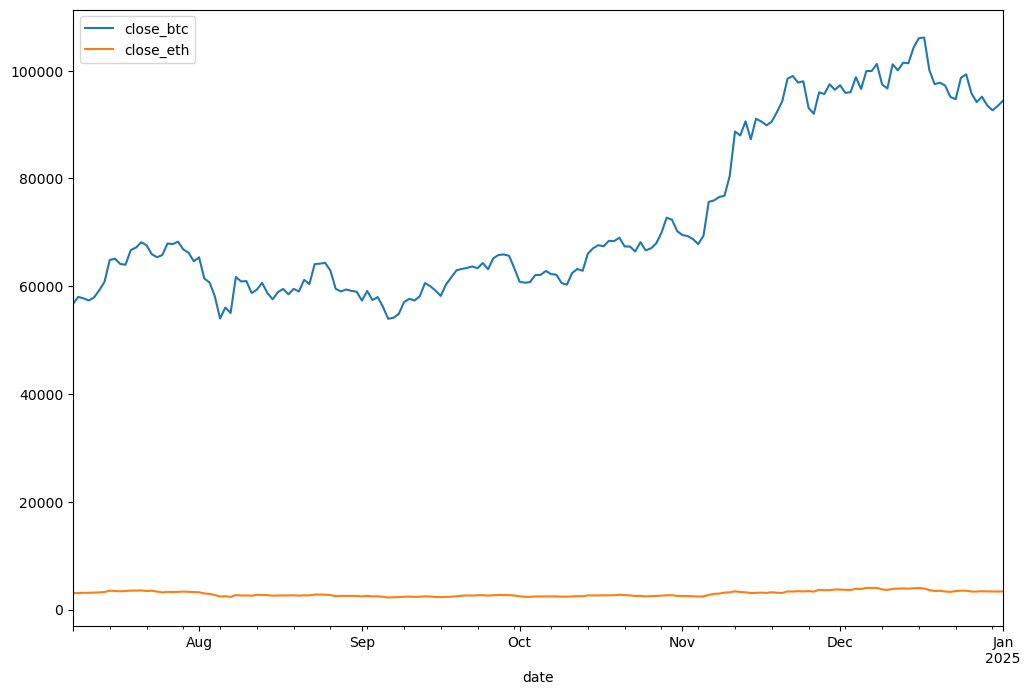

In [66]:
#afficher avec plot()
#créer une figure pour le graphique avec une taille personnalisée
btc_eth[['close_btc', 'close_eth']].plot(figsize= (12, 8))

In [67]:
#les 2 cryptomonnaies ne partagent pas la même échelle
#ça rend la lecture de l'ethereum un peu compliqué
#on crée alors des subplots

In [ ]:
#afficher avec plot()
#créer une figure pour le graphique avec une taille personnalisée
#avec subplots= True
btc_eth[['close_btc', 'close_eth']].plot(subplots= True, figsize= (12, 8))

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

In [ ]:
#on voit que les 2 sont bien corrélés

### Pandas corr()

In [ ]:
#voir la matrice de correlation entre les 2 colonnes: close_btc et close_eth
btc_eth[['close_btc', 'close_eth']].corr()

In [ ]:
#corrélation de 80% (très élevée)